In [1]:
#install.packages("MASS")

In [2]:
require(MASS)

Loading required package: MASS


In [3]:
df=read.csv("/home/yichiehweng/python/machineLearning/ridge_regression/Beijing_PM25/data/PRSA_data.csv")

In [4]:
head(df,5)

No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
1,2010,1,1,0,NA,-21,-11,1021,NW,1.79,0,0
2,2010,1,1,1,NA,-21,-12,1020,NW,4.92,0,0
3,2010,1,1,2,NA,-21,-11,1019,NW,6.71,0,0
4,2010,1,1,3,NA,-21,-14,1019,NW,9.84,0,0
5,2010,1,1,4,NA,-20,-12,1018,NW,12.97,0,0


In [5]:
sapply(df, function(x) sum(is.na(x)))      

No  year month   day  hour pm2.5  DEWP  TEMP  PRES  cbwd   Iws    Is    Ir 
    0     0     0     0     0  2067     0     0     0     0     0     0     0

In [6]:
f=function(x){

  x<-as.numeric(as.character(x)) 

  x[is.na(x)] =median(x, na.rm=TRUE) 

  x

}

In [7]:
df["pm2.5"]<-data.frame(apply(df["pm2.5"],2,f))

In [8]:
smp.size = floor(0.8*nrow(df)) 

In [9]:
set.seed(500)                     

In [10]:
train.ind = sample(seq_len(nrow(df)), smp.size)

In [11]:
train = df[train.ind, ]

In [12]:
test = df[-train.ind, ] 

In [13]:
model_1 <- lm(pm2.5~ year+month+day+hour+DEWP+TEMP+PRES+Iws+Is+Ir,train)

In [14]:
summary(model_1)


Call:
lm(formula = pm2.5 ~ year + month + day + hour + DEWP + TEMP + 
    PRES + Iws + Is + Ir, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-164.83  -50.97  -15.66   31.82  878.83 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.327e+03  6.005e+02  -2.210   0.0271 *  
year         1.501e+00  2.969e-01   5.056 4.29e-07 ***
month       -1.509e+00  1.282e-01 -11.772  < 2e-16 ***
day          7.161e-01  4.752e-02  15.070  < 2e-16 ***
hour         1.547e+00  6.332e-02  24.431  < 2e-16 ***
DEWP         4.506e+00  6.014e-02  74.917  < 2e-16 ***
TEMP        -6.323e+00  7.610e-02 -83.086  < 2e-16 ***
PRES        -1.513e+00  7.755e-02 -19.515  < 2e-16 ***
Iws         -2.343e-01  8.951e-03 -26.172  < 2e-16 ***
Is          -2.756e+00  5.736e-01  -4.805 1.55e-06 ***
Ir          -6.818e+00  2.942e-01 -23.172  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 78.13 on 35048 degrees of f

       Length Class  Mode   
coef   1010   -none- numeric
scales   10   -none- numeric
Inter     1   -none- numeric
lambda  101   -none- numeric
ym        1   -none- numeric
xm       10   -none- numeric
GCV     101   -none- numeric
kHKB      1   -none- numeric
kLW       1   -none- numeric

modified HKB estimator is 4.508177 
modified L-W estimator is 24.80011 
smallest value of GCV  at 0.1 


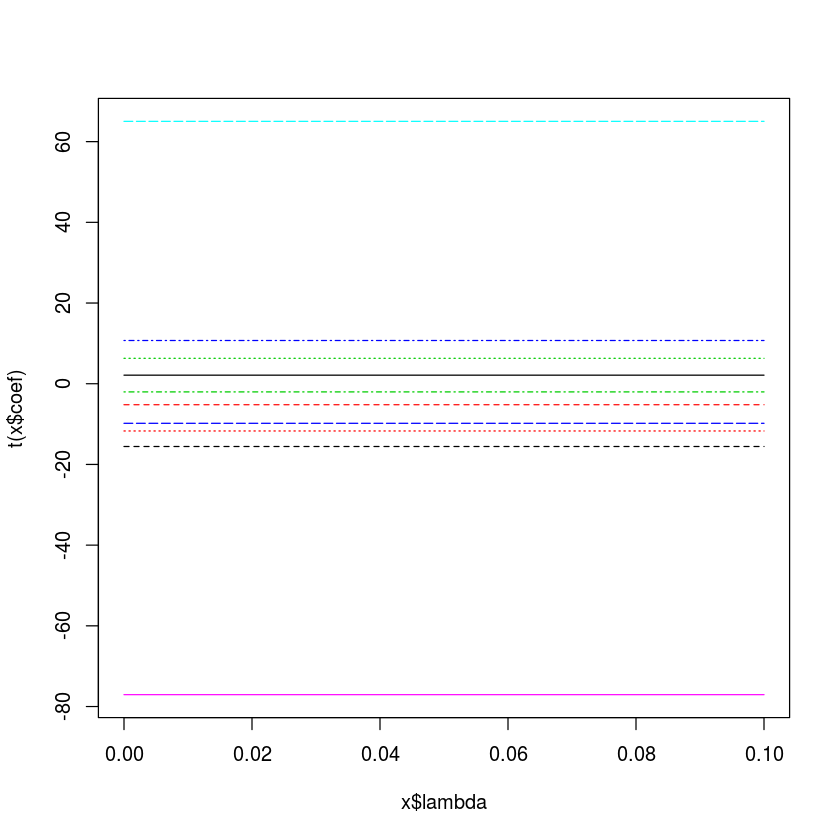

In [15]:
ridge <- lm.ridge(pm2.5~ year+month+day+hour+DEWP+TEMP+PRES+Iws+Is+Ir,train, lambda = seq(0, .1, .001))
summary(ridge)
plot(ridge)
select(ridge)

modified HKB estimator is 4.508177 
modified L-W estimator is 24.80011 
smallest value of GCV  at 0.1 


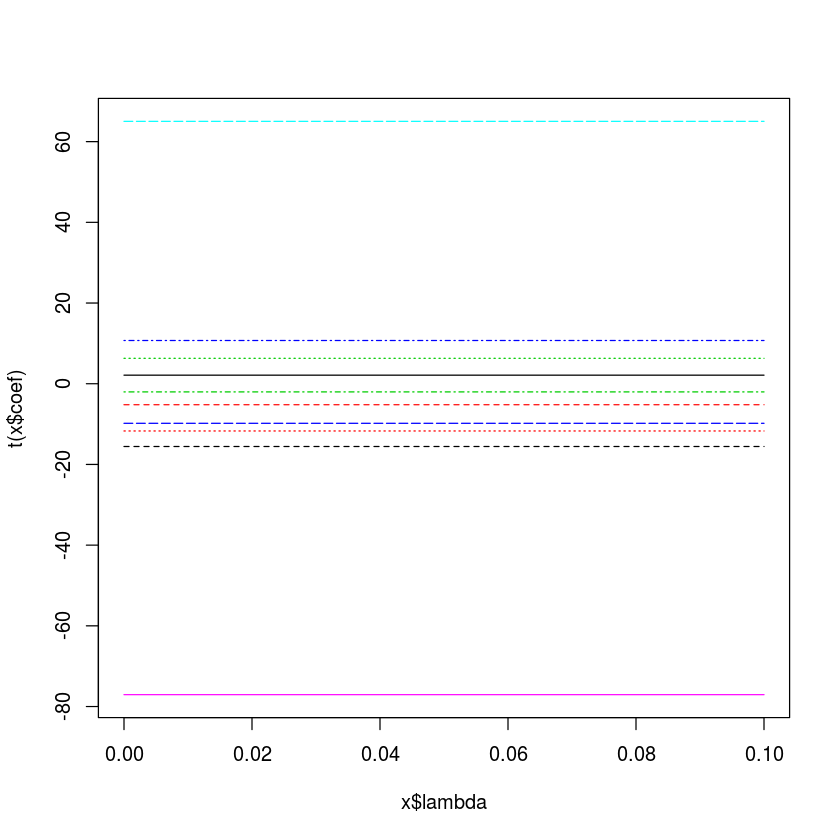

In [16]:
ridge_2 <- lm.ridge(pm2.5~ year+month+day+hour+DEWP+TEMP+PRES+Iws+Is+Ir,train, lambda = seq(0, 0.1, .01))
plot(ridge_2)
select(ridge_2)

modified HKB estimator is 4.508177 
modified L-W estimator is 24.80011 
smallest value of GCV  at 2 


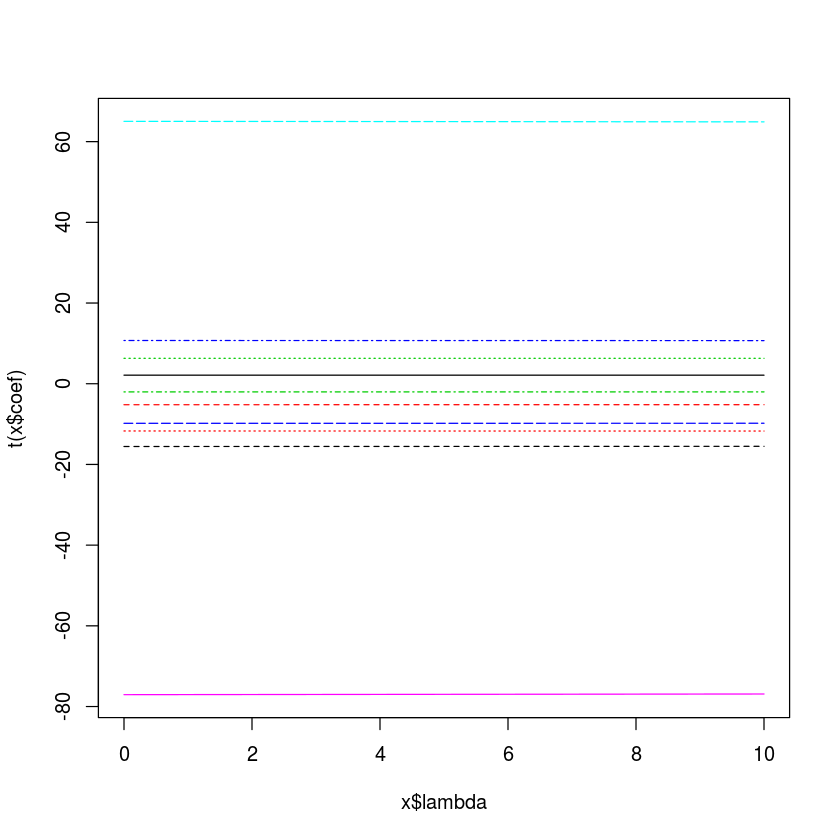

In [17]:
ridge_3 <- lm.ridge(pm2.5~ year+month+day+hour+DEWP+TEMP+PRES+Iws+Is+Ir,train, lambda = seq(0, 10, 1))
plot(ridge_3)
select(ridge_3)

In [18]:
ridge.final <- lm.ridge (pm2.5~ year+month+day+hour+DEWP+TEMP+PRES+Iws+Is+Ir,train, lambda = 2)
summary(ridge.final)

       Length Class  Mode   
coef   10     -none- numeric
scales 10     -none- numeric
Inter   1     -none- numeric
lambda  1     -none- numeric
ym      1     -none- numeric
xm     10     -none- numeric
GCV     1     -none- numeric
kHKB    1     -none- numeric
kLW     1     -none- numeric

In [19]:
test.pred = predict(model_1, test)

In [20]:
test.ridge.pred <- as.matrix(cbind(const=1,test[,-c(1,6,10)])) %*% coef(ridge.final)

In [21]:
mspe1=mean((test$pm2.5-test.pred)^2)

In [22]:
mspe1

[1] 6172.191

In [23]:
mspe2=mean((test$pm2.5-test.ridge.pred)^2)

In [24]:
mspe2

[1] 6172.216